# **Aplicación de técnicas de machine learning para la predicción del riesgo de default de un cliente en una compañía de filipinas**

Realizado por: 

* Andrés Medina Báez       cc 1036654885
* Manuela Ramírez Quiceno  cc 1037657504

# 1.Introducción






Home Credit es una empresa de filipinas que busca ofrecer créditos a personas con antecedentes crediticios insuficientes o inexistentes, buscando la inclusión financiera de la población no bancarizada.

Para ello, esta compañía busca utilizar información transaccional y de telecomunicaciones, con el fin de predecir el riesgo de default de sus clientes.


**Principal Objetivo**: ¿Al cliente, le debo o no de otorgar el préstamo a partir de su riesgo de default? 


**Variable Objetivo**: Probabilidad de que el cliente presente retrasos en el pago de su cuota  (1) o no (0)

# 2.Importar librerias

Las librerías a usar en la carga de los datos son:



*   pandas: Para cargar los datos en dataframes.
*   numpy: Para operaciones con matrices, filas y/o columnas.
*   matplotlib: Para graficar.
*   os: Para interactuar con diferentes rutas.
*plotly: Para graficar la matriz de correlación.
*sklearn: Para hacer la separación de la data en train y test, y para los modelos de ML y las métricas de evaluación.
* imblearn: Tratamiento para datas desbalanceadas.

In [1]:
##Importación de librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn import model_selection
import plotly.express as px
from sklearn.feature_selection import SelectKBest,f_classif
# Evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_precision_recall_curve
# Selected algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
#Importar GridSearch 
from sklearn.model_selection import GridSearchCV
#Técnica submuestreo
from imblearn.under_sampling import RandomUnderSampler

# 3.Cargar la Data

Se carga el archivo de salida del notebook 09-Preprocesamiento_Data_Elegida.ipynb

In [2]:
## Carga de la data
data = pd.read_csv("06-DF_Final_60cols.csv",index_col=0) # Read data
data_original=data.copy()
##Muestra un encabezado de la data
data.head(5)

,TARGET,FLAG_OWN_CAR,CNT_CHILDREN,AMT_CREDIT_x,DAYS_BIRTH,MONTHS_EMPLOYED,REGION_RATING_CLIENT_W_CITY,EXT_SOURCE_2,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,...,NAME_PORTFOLIO_Cash,NAME_PORTFOLIO_POS,NAME_PRODUCT_TYPE_walk-in,ind_vel_monto_cr,WALLSMATERIAL_MODE_DUROS,WALLSMATERIAL_MODE_ARMABLES,OCCUPATION_TYPE_BAJO,OCCUPATION_TYPE_MEDIO,OCCUPATION_TYPE_ALTO,indice_falta_pagar
0,1,0,0.0,406597.5,26.0,21.0,2,0.262949,1,1,...,0.0,1.0,0.0,1.000000,1,0,1,0,0,0.284122
1,0,0,0.0,1293502.5,46.0,40.0,1,0.622246,0,0,...,1.0,2.0,0.0,1.000000,1,0,0,1,0,0.000000
2,0,1,0.0,135000.0,52.0,8.0,2,0.555912,0,0,...,0.0,1.0,0.0,1.000000,0,0,1,0,0,0.000000
3,0,0,0.0,312682.5,52.0,101.0,2,0.650442,0,0,...,3.0,2.0,0.0,1.000000,0,0,1,0,0,0.000000
4,0,0,0.0,513000.0,55.0,101.0,2,0.322738,0,0,...,4.0,2.0,1.0,1.037038,0,0,0,1,0,0.000000


##### Revisa Carga de la Data

In [3]:
##Separación de variables categóricas y numéricas

Category=['TARGET','NAME_INCOME_TYPE_Businessman','NAME_INCOME_TYPE_Commercial associate',\
          'NAME_INCOME_TYPE_Others','NAME_INCOME_TYPE_Pensioner',\
          'NAME_INCOME_TYPE_Working','NAME_EDUCATION_TYPE_Higher education',\
          'NAME_EDUCATION_TYPE_Incomplete higher','NAME_EDUCATION_TYPE_Lower secondary',\
          'NAME_EDUCATION_TYPE_Secondary / secondary special','NAME_HOUSING_TYPE_House / apartment',\
          'NAME_HOUSING_TYPE_Rented apartment','NAME_HOUSING_TYPE_With parents',\
          'FONDKAPREMONT_MODE_org spec account','FONDKAPREMONT_MODE_reg oper account',\
          'FONDKAPREMONT_MODE_reg oper spec account','HOUSETYPE_MODE_specific housing',\
          'WALLSMATERIAL_MODE_Others','WALLSMATERIAL_MODE_DUROS','WALLSMATERIAL_MODE_ARMABLES',\
          'OCCUPATION_TYPE_BAJO','OCCUPATION_TYPE_MEDIO','OCCUPATION_TYPE_ALTO',\
          'DEF_30_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','CREDIT_TYPE_Microloan','CREDIT_TYPE_Mortgage',\
          'NAME_CLIENT_TYPE_New','FLAG_OWN_CAR','REGION_RATING_CLIENT_W_CITY',\
          'NAME_INCOME_TYPE_State servant','HOUSETYPE_MODE_block of flats']

Float=['CNT_CHILDREN','AMT_CREDIT_x','DAYS_BIRTH','MONTHS_EMPLOYED',\
       'EXT_SOURCE_2','DAYS_CREDIT',\
       'AMT_CREDIT_SUM_OVERDUE','DAYS_CREDIT_UPDATE','CREDIT_ACTIVE_Active','CREDIT_ACTIVE_Closed',\
       'CREDIT_TYPE_Another type of loan','CREDIT_TYPE_Consumer credit',\
       'AMT_ANNUITY','RATE_DOWN_PAYMENT',\
       'AMT_DOWN_PAYMENT','CNT_PAYMENT','DAYS_DECISION','DAYS_FIRST_DRAWING',\
       'DAYS_TERMINATION','NAME_CONTRACT_STATUS_Approved',\
       'NAME_CONTRACT_STATUS_Canceled','NAME_CONTRACT_STATUS_Refused',\
       'NAME_PORTFOLIO_Cards','NAME_PORTFOLIO_Cash',\
       'NAME_PORTFOLIO_POS','NAME_PRODUCT_TYPE_walk-in','ind_vel_monto_cr','indice_falta_pagar']


for i in Category: 
  data[i]=data[i].astype('category')

for i in Float: 
  data[i]=data[i].astype('float64')

In [4]:
Cuantitativas=Float
Cualitativas=Category

In [5]:
##Dimensión de la data
data.shape

(295221, 60)

In [6]:
##Información de las variables de la data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 295221 entries, 0 to 295236
Data columns (total 60 columns):
 #   Column                                             Non-Null Count   Dtype   
---  ------                                             --------------   -----   
 0   TARGET                                             295221 non-null  category
 1   FLAG_OWN_CAR                                       295221 non-null  category
 2   CNT_CHILDREN                                       295221 non-null  float64 
 3   AMT_CREDIT_x                                       295221 non-null  float64 
 4   DAYS_BIRTH                                         295221 non-null  float64 
 5   MONTHS_EMPLOYED                                    295221 non-null  float64 
 6   REGION_RATING_CLIENT_W_CITY                        295221 non-null  category
 7   EXT_SOURCE_2                                       295221 non-null  float64 
 8   DEF_30_CNT_SOCIAL_CIRCLE                           295221 non-nu

In [7]:
##Se observa la cantidad de nulos de la data
data.isnull().sum().sum()

0

##### Select KBest

In [8]:
##Separación de la data entre las variables y la variable objetivo
X=data.drop("TARGET", axis=1)
Y=data["TARGET"]

##Se selecciona con el SelectKBest las 15 variables más relevantes en la variable objetivo
selector=SelectKBest(score_func=f_classif,k=15)
X_nuevo=selector.fit_transform(X,Y)

cols=selector.get_support(indices=True)
X.iloc[:,cols].columns

Index(['DAYS_BIRTH', 'MONTHS_EMPLOYED', 'REGION_RATING_CLIENT_W_CITY',
       'EXT_SOURCE_2', 'NAME_INCOME_TYPE_Pensioner',
       'NAME_INCOME_TYPE_Working', 'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Secondary / secondary special', 'DAYS_CREDIT',
       'CREDIT_TYPE_Microloan', 'NAME_CONTRACT_STATUS_Refused',
       'NAME_PRODUCT_TYPE_walk-in', 'ind_vel_monto_cr', 'OCCUPATION_TYPE_BAJO',
       'indice_falta_pagar'],
      dtype='object')

In [9]:
#Para data utilizando K-Best
X = data[['DAYS_BIRTH', 'MONTHS_EMPLOYED', 'REGION_RATING_CLIENT_W_CITY',\
        'EXT_SOURCE_2', 'NAME_INCOME_TYPE_Pensioner',\
        'NAME_INCOME_TYPE_Working', 'NAME_EDUCATION_TYPE_Higher education',\
        'NAME_EDUCATION_TYPE_Secondary / secondary special', 'DAYS_CREDIT',\
        'CREDIT_TYPE_Microloan', 'NAME_CONTRACT_STATUS_Refused',\
        'NAME_PRODUCT_TYPE_walk-in', 'ind_vel_monto_cr', 'OCCUPATION_TYPE_BAJO',\
        'indice_falta_pagar']].copy()
y= data["TARGET"]

In [10]:
##Se muestra la nueva dimensión de la data
X.shape, y.shape

((295221, 15), (295221,))

# 4.Partición de la data en train y test

Teniendo en cuenta que nos estamos enfrentando a un problema de data desbalanceada, se realiza la partición garantizando un muestreo estratificado para la variable TARGET

## Split dataset 70/30

In [11]:
##Separación de la data entre los datos de entrenamiento y de evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3,random_state =42, stratify=y)

In [12]:
##Se imprime el porcentaje de las muestras positivas para ver que si se separa bien la variable desbalanceada
perc_test = y_test.value_counts()[1]*100/len(y_test)
perc_train = y_train.value_counts()[1]*100/len(y_train)

print(f"Porcentaje de muestras positivas en el dataset de train={round(perc_test,4)} , y de test={round(perc_train,4)}")

Porcentaje de muestras positivas en el dataset de train=8.0752 , y de test=8.0753


##### Balanceo de los Datos

Se debe realizar un balanceo de los datos, toda vez que nuestra variable objetivo "Cae (1) o no Cae (0) en default", está desbalanceada: 

In [13]:
num_1=data[data['TARGET']==1]['TARGET'].count()
num_0=data[data['TARGET']==0]['TARGET'].count()
print('''El número de registros los cuales se clasifican como clientes que presentan retraso en las cuotas del préstamo son {}
El número de registros los cuales se clasifican como clientes que no presentan retraso en las cuotas del préstamo son {}'''.format(num_1,num_0))

El número de registros los cuales se clasifican como clientes que presentan retraso en las cuotas del préstamo son 23840
El número de registros los cuales se clasifican como clientes que no presentan retraso en las cuotas del préstamo son 271381


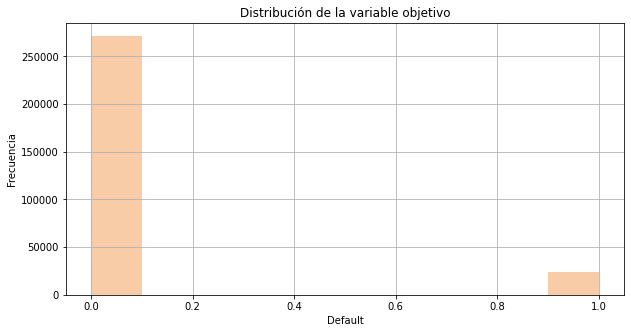

In [14]:
##Gráfica de la variable objetivo para observar desbalanceo
vo=data['TARGET']
plt.figure(figsize=(10,5))
plt.hist(vo,alpha=0.6, color='#F2AB6D')
plt.title('Distribución de la variable objetivo')
plt.xlabel('Default')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

De lo anterior, se observa que en los datos de entrenamiento hay un porcentaje mucho mayor de datos de la clase 0 que de la clase 1, lo cual es indicativo de un problema de clases desbalanceadas

In [15]:
print('''Porcentaje de datos de la clase 0: {}%
Porcentaje de datos de la clase 1: {}%'''.format(round(100*num_0/data.shape[0],2),round(100*num_1/data.shape[0],2)))

Porcentaje de datos de la clase 0: 91.92%
Porcentaje de datos de la clase 1: 8.08%


###### Random Under Sampler

In [16]:
##Se realiza la partición de la data que contiene la variable desbalanceada con mayor registros, eliminando los excedentes para quedar con igual registros con target 0 y 1
ru=RandomUnderSampler()
X_s,y_s=ru.fit_resample(X_train,y_train)

In [17]:
#Dimensión de la data
X_s.shape


(33376, 15)

In [18]:
##Dimensión de la variable objetivo
y_s.shape

(33376,)

In [19]:
##Se revisa que no hayan datos nulos
X_s.isnull().sum().sum()

0

In [20]:
X_train=X_s.copy()
y_train=y_s.copy()

# 5.Selección de la métrica de desempeño del modelo

Selección de la métrica de evaluación: 


En el reto de kaggle piden que la métrica de evaluación sea el área ROC.

En los modelos anteriores aunque el área ROC arrojaba un buen resultado, al evaluar el modelo, para el caso del negocio, no se tenían buenas predicciones de las personas que caian en default, que para este problema, sería el peor caso para el sistema bancario. Por tanto, se eligen los modelos que tienen un buen área roc y al mismo tiempo daban las mejores mediciones de Recall.

# 6.Modelos finales

Los modelos seleccionados como los mejores de este estudio fueron: 
* Regresión Logística, Con SMOTE por debajo, parametros óptimizados	
* Random Forest, Con SMOTE por debajo, parametros óptimizados	

## 6.1. Modelamiento

### 6.1.1 Regresión Logistica con parámetros optimizados

In [21]:
##Creación y entrenamiento de modelo
rl=LogisticRegression(solver='liblinear',penalty='l2', C=1) 
rl.fit(X_train, y_train)

LogisticRegression(C=1, solver='liblinear')

### 6.1.2 Random Forest con parámetros optimizados

In [22]:
##Creación y entrenamiento de modelo
rfc = RandomForestClassifier(n_estimators = 250, criterion = 'gini', max_depth=5, max_features='auto', min_samples_leaf=0.05,\
                             ccp_alpha=0) 
rfc.fit(X_train,y_train) 

RandomForestClassifier(ccp_alpha=0, max_depth=5, min_samples_leaf=0.05,
                       n_estimators=250)

## 6.2 Predicción del Modelo

In [23]:
##Prediccón de ambos modelos
y_rl_pred=rl.predict(X_test)
y_rfc_pred=rfc.predict(X_test)

In [24]:
### 2.1.4. Evaluación de los Modelos
print('Accuracy')
print('-------------------------------------------------------------------------------------------------')
print(f"Logistic Regresion       : Score_entrenamiento:{round(rl.score(X_train, y_train),4)}, & Score_validacion:{round(accuracy_score(y_test,y_rl_pred),4)}")
print(f"Random Forest            : Score_entrenamiento:{round(rfc.score(X_train, y_train),4)},  & Score_validacion:{round(accuracy_score(y_test,y_rfc_pred),4)}\n")

print('Recall')
print('-------------------------------------------------------------------------------------------------')
print(f"Logistic Regresion       : Recall_validacion:{1-round(recall_score(y_test,y_rl_pred),4)}")
print(f"Random Forest            : Recall_validacion:{1-round(recall_score(y_test,y_rfc_pred),4)}")


Accuracy
-------------------------------------------------------------------------------------------------
Logistic Regresion       : Score_entrenamiento:0.6595, & Score_validacion:0.6646
Random Forest            : Score_entrenamiento:0.6526,  & Score_validacion:0.6479

Recall
-------------------------------------------------------------------------------------------------
Logistic Regresion       : Recall_validacion:0.3537
Random Forest            : Recall_validacion:0.35640000000000005


In [25]:
#Classification Report para los modelos 
print(f"Logistic Regresion  Results:\n" 
      f"{classification_report(y_test,y_rl_pred)}\n")

print(f"Random Forest:\n" 
      f"{classification_report(y_test,y_rfc_pred)}\n")

Logistic Regresion  Results:
              precision    recall  f1-score   support

           0       0.96      0.67      0.79     81415
           1       0.15      0.65      0.24      7152

    accuracy                           0.66     88567
   macro avg       0.55      0.66      0.51     88567
weighted avg       0.89      0.66      0.74     88567


Random Forest:
              precision    recall  f1-score   support

           0       0.95      0.65      0.77     81415
           1       0.14      0.64      0.23      7152

    accuracy                           0.65     88567
   macro avg       0.55      0.65      0.50     88567
weighted avg       0.89      0.65      0.73     88567




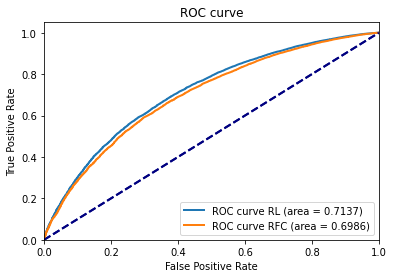

In [26]:
labels=['Logistic Regresion','Random Forest']
fpr =[]
tpr = []
mod=''

#Complete el código
for i in range(len(labels)):
  fpr.append(0)
  tpr.append(0)
  if i==0:
    y_pred2 = rl.predict_proba(X_test)
    mod='RL'
  else:
    y_pred2 = rfc.predict_proba(X_test)
    mod='RFC'
  score = y_pred2[:,0]-y_pred2[:,1]
  fpr[i], tpr[i],_ = roc_curve(y_test,score)
  roc_auc = 1 - auc(fpr[i], tpr[i])
  plt.plot(tpr[i],fpr[i],lw=2, label='ROC curve {} (area = {})'.format(mod,round(roc_auc,4)))
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC curve')
  plt.legend(loc="lower right")
  plt.grid()
plt.show()

# 7.Evaluación Final sobre el Conjunto de Test, en el modelo ganador

In [27]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_precision_recall_curve

##### Para el modelo ganador: Random Forest Classifier según optimización de parámetros

In [28]:
y_pred = rfc.predict(X_test)

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.65      0.77     81415
           1       0.14      0.64      0.23      7152

    accuracy                           0.65     88567
   macro avg       0.55      0.65      0.50     88567
weighted avg       0.89      0.65      0.73     88567



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


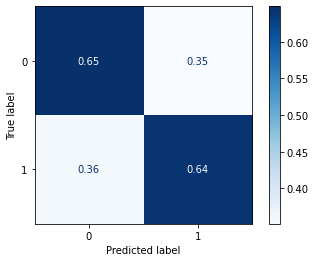

In [30]:
plot_confusion_matrix(rfc, X_test, y_test,cmap=plt.cm.Blues,normalize='true');

In [31]:
#Cálculo del Recall
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
sensitivity = tp / (tp+fn)
sensitivity

0.643596196868009

In [32]:
Negative_predictive_value = tn /(tn+fn)
Negative_predictive_value

0.9539326248825273

#8. Conclusiones



-El modelo ganador del reto en kaggle obtuvo un área roc de 0.80570, por tanto, el resultado obtenido, a pesar de diferir en aproximadamente 0.1, da la tranquilidad de alcanzar el objetivo del reto.



-A pesar de que el reto tenía una métrica de evaluación bajo el área roc, se realiza análisis la condiciones del negocio, aportandole al modelo, no solo un buen área ROC, sino aumentando la métrica Recall, que para el negocio, es la más penalizada en caso de predecir mal.



-A pesar de no tener como cubrir el costo computacional para lograr un modelo con muchas variables, como se quería con las máquinas de soporte vectorial, el tratamiento y la reducción de la data, nos permitió encontrar modelos con una buena métrica.

